In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

In [5]:
corelation=df.corr()
corelation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

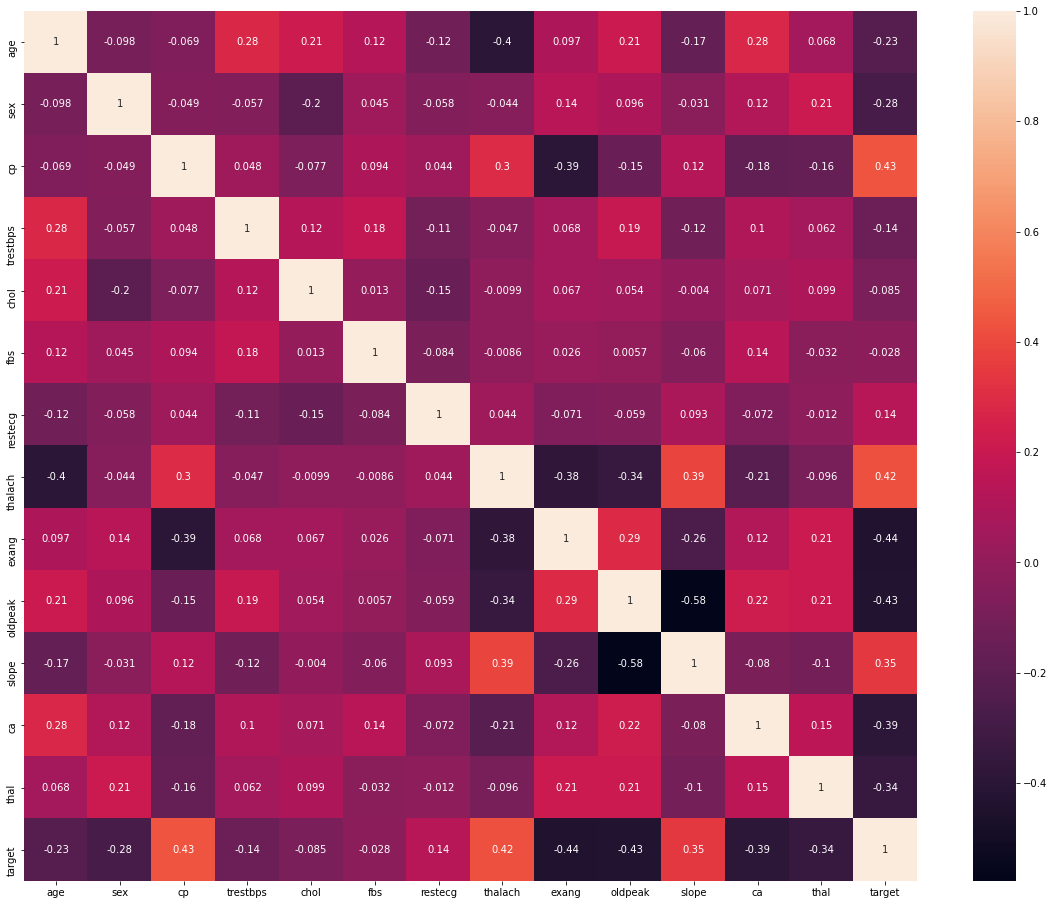

In [6]:
import seaborn as sn
plt.figure(figsize=(20,16))
sn.heatmap(corelation,annot=True)

# Checking whether our target feature is balanced or not

In [8]:
df[df['target']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
df[df['target']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
#This shows that our target variable is balanced 

# Converting categorical data into labels

In [277]:
dummy_df=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
dummy_df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [282]:
X=dummy_df.drop('target',axis=1)
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [283]:
y=dummy_df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8,stratify=y)

# Using KNeighbors Classifier

In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [288]:
knn.score(X_test,y_test)

0.7236842105263158

In [289]:
knn.score(X_train,y_train)

0.7577092511013216

# Using SVM

In [290]:
from sklearn.svm import SVC

In [291]:
svc=SVC(C=1.0,kernel='rbf',degree=3,gamma='scale')

In [292]:
svc.fit(X_train,y_train)

SVC()

In [293]:
svc.score(X_test,y_test)

0.6842105263157895

In [294]:
svc.score(X_train,y_train)

0.6563876651982379

# Using Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
lr_model=LogisticRegression()

In [299]:
lr_model.fit(X_train,y_train)

C:\Users\Zain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [300]:
lr_model.score(X_test,y_test)

0.881578947368421

In [301]:
lr_model.score(X_train,y_train)

0.8678414096916299

# Using Decision Tree

In [302]:
from sklearn.tree import DecisionTreeClassifier

In [303]:
tree=DecisionTreeClassifier()

In [304]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [305]:
tree.score(X_test,y_test)

0.8289473684210527

In [306]:
tree.score(X_train,y_train)

1.0

# Using Random Forest Classifier

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
random_forest=RandomForestClassifier()

In [309]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [310]:
random_forest.score(X_test,y_test)

0.868421052631579

In [311]:
random_forest.score(X_train,y_train)

1.0

# Using NaiveBayes

In [312]:
from sklearn.naive_bayes import GaussianNB 

In [313]:
gnb=GaussianNB()

In [314]:
gnb.fit(X_train,y_train)

GaussianNB()

In [315]:
gnb.score(X_test,y_test)

0.8157894736842105

In [316]:
gnb.score(X_train,y_train)

0.8149779735682819

# Usinf Grid Search CV to find best model and best hyper-parameters

In [317]:
from sklearn.model_selection import GridSearchCV

In [318]:
dictionary={"svm":{'model':SVC(),"params":{"kernel":['linear','rbf', 'sigmoid'],"gamma":['scale','auto']}},
      'knn':{"model":KNeighborsClassifier(),'params':{"n_neighbors":[3,4,5,6,7,8,9,10,11,13,12,15],"weights":['uniform', 'distance']}},
      'lr':{'model':LogisticRegression(),'params':{}},
      'rf':{"model":RandomForestClassifier(),'params':{"n_estimators":[10,20,40,60,70,80,90,100],"criterion":["gini","entropy"]}},
      'dt':{"model":DecisionTreeClassifier(),"params":{"criterion":["gini", "entropy"],'splitter':["best", "random"]}},
      'gnb':{"model":GaussianNB(),"params":{}}
      }

In [319]:
dictionary.values()

dict_values([{'model': SVC(), 'params': {'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}}, {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 15], 'weights': ['uniform', 'distance']}}, {'model': LogisticRegression(), 'params': {}}, {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 20, 40, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy']}}, {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}, {'model': GaussianNB(), 'params': {}}])

In [320]:
scores=[]
for key,value in dictionary.items():
    gridsearch_clf=GridSearchCV(value['model'],value['params'],return_train_score=False)
    gridsearch_clf.fit(X,y)
    scores.append({'Model':key,"Best params":gridsearch_clf.best_params_,'Best Score':gridsearch_clf.best_score_})
    

C:\Users\Zain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [321]:
scores=pd.DataFrame(scores)
scores

,Model,Best params,Best Score
0,svm,"{'gamma': 'scale', 'kernel': 'linear'}",0.814973
1,knn,"{'n_neighbors': 12, 'weights': 'uniform'}",0.663443
2,lr,{},0.851257
3,rf,"{'criterion': 'entropy', 'n_estimators': 100}",0.851421
4,dt,"{'criterion': 'entropy', 'splitter': 'random'}",0.798251
5,gnb,{},0.795082


In [322]:
#The above df shows that SVM,KNN, LogisticRegression and Randomforest classifiers give same accuracy of 84%.
#So, we can choose any of them

# Choosing Logistic Regression as my final model

In [340]:
final=LogisticRegression()
final.fit(X_train,y_train)

C:\Users\Zain\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [341]:
final.score(X_test,y_test)

0.881578947368421

In [342]:
final.score(X_train,y_train)

0.8678414096916299

# Making Some Predictions

In [343]:
y_pred=lr_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [344]:
def predict (age, sex, cp, trestps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    t=np.zeros(len(X.columns))
    
    sex='sex_'+str(sex)
    cp='cp_'+str(cp)
    fbs='fbs_'+str(fbs)
    restecg='restecg_'+str(restecg)
    exang='exang_'+str(exang)
    slope="slope_"+str(slope)
    ca='ca_'+str(ca)
    thal='thal_'+str(thal)
    
    t[0]=age
    t[1]=trestps
    t[2]=chol
    t[3]=thalach
    t[4]=oldpeak
    
    for i in range (6,30):
        if X.columns[i]==sex:
            t[i]=1
        elif X.columns[i]==cp:
            t[i]=1
        elif X.columns[i]==fbs:
            t[i]=1
        elif X.columns[i]==restecg:
            t[i]=1
        elif X.columns[i]==exang:
            t[i]=1
        elif X.columns[i]==slope:
            t[i]=1
        elif X.columns[i]==ca:
            t[i]=1
        elif X.columns[i]==thal:
            t[i]=1
    prediction=lr_model.predict([t])
    return prediction[0]

In [345]:
# predict (age, sex, cp, trestps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
tmp=predict(4.40e+01, 1.00e+00, 2.00e+00, 1.40e+02, 2.35e+02, 0.00e+00,
        0.00e+00, 1.80e+02, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        2.00e+00)
tmp

1

# Visualizing the predictions

In [346]:
from sklearn.metrics import confusion_matrix

In [347]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[30,  5],
       [ 4, 37]], dtype=int64)

Text(51.0, 0.5, 'y_true')

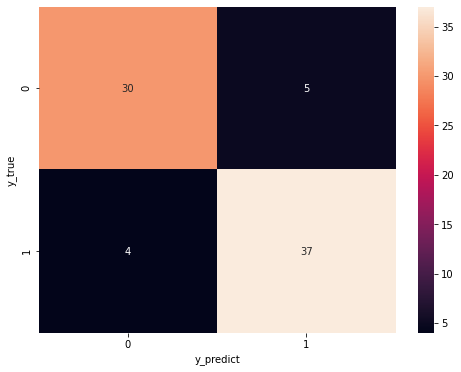

In [348]:
plt.figure(figsize=(8,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('y_predict')
plt.ylabel('y_true')

In [349]:
from sklearn.metrics import classification_report

In [350]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

